## Importing necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Loading the Fashion MNIST dataset

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

## Preprocessing the data

### Normalizing pixel values to be between 0 and 1

In [3]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

### Adding a channel dimension (required for CNN)

In [4]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

### Converting class vectors to binary class matrices (one-hot encoding)

In [5]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Defining the CNN model with 6 layers

In [7]:
model = Sequential([
    # First convolutional layer
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Second convolutional layer
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten the output for dense layers
    layers.Flatten(),
    
    # First dense layer
    layers.Dense(128, activation="relu"),
    
    # Output layer
    layers.Dense(num_classes, activation="softmax")
])

## Compiling the model

In [8]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

## Training the model

In [10]:
batch_size = 128
epochs = 15
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 29s 64ms/step - accuracy: 0.7192 - loss: 0.8125 - val_accuracy: 0.8638 - val_loss: 0.3730
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 59ms/step - accuracy: 0.8732 - loss: 0.3534 - val_accuracy: 0.8828 - val_loss: 0.3305
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 60ms/step - accuracy: 0.8888 - loss: 0.3058 - val_accuracy: 0.8935 - val_loss: 0.2992
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 58ms/step - accuracy: 0.9001 - loss: 0.2754 - val_accuracy: 0.8993 - val_loss: 0.2809
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 30s 71ms/step - accuracy: 0.9086 - loss: 0.2514 - val_accuracy: 0.9038 - val_loss: 0.2740
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 28s 67ms/step - accuracy: 0.9142 - loss: 0.2323 - val_accuracy: 0.9078 - val_loss: 0.2608
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 27s 64ms/step - accuracy: 0.9225 - loss: 0.2143 - val_accuracy: 0.9080 - val_loss: 0.2555
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 57ms/step - accuracy: 0.9242 - loss: 0.2025 - 

## Evaluating the model on test data

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2692655026912689
Test accuracy: 0.9139999747276306


## Making predictions on sample images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


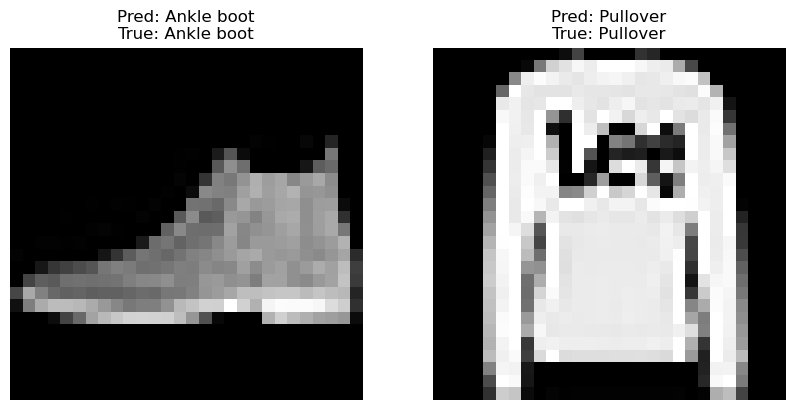

In [15]:
# Let's select two images from the test set
sample_images = x_test[:2]
sample_labels = y_test[:2]

# Get model predictions
predictions = model.predict(sample_images)

# Class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display the images and predictions
plt.figure(figsize=(10, 5))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(sample_images[i].squeeze(), cmap='gray')
    predicted_class = np.argmax(predictions[i])
    true_class = np.argmax(sample_labels[i])
    plt.title(f"Pred: {class_names[predicted_class]}\nTrue: {class_names[true_class]}")
    plt.axis('off')
plt.show()

# Save the model
model.save("fashion_mnist_cnn.keras")
